# Cross - Validation (Numpy)

In [ ]:
#import libraries
import numpy as np
import torch
import torch.nn as nn


In [ ]:
#import iris dataset
import seaborn as sns
iris = sns.load_dataset('iris')

#convert from pandas dataframe to tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()

#Create the true labels
labels = torch.zeros(len(data),dtype=torch.long)
labels[iris.species == 'setosa'] = 0
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

In [ ]:
#Seperate data into train and test set
propTrain = 0.8
no_of_Training = int(len(labels)*propTrain)

#initiate a boolean vector to select the smaples which are present in train
trainBool = np.zeros(len(labels),dtype = bool)

# # Wrong way to take the train set and test set because train and test sets data will not be randomized
# trainBool[range(no_of_Training)] = True

# # Correct way to select train data and test data
itemsforTrain = np.random.choice(range(len(labels)),no_of_Training,replace = False)
trainBool[itemsforTrain] = True

trainBool

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True, False,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True,  True,  True,  True,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True, False, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
#compute averages

TotalAvg = torch.mean(labels.float())
print(f'Avg of full data = {TotalAvg}') #Should be = 1

TrainAvg = torch.mean(labels[trainBool].float())
print(f'Train data Avg = {TrainAvg}')

TestAvg = torch.mean(labels[~trainBool].float())
print(f'Test data Avg = {TestAvg}')

Avg of full data = 1.0
Train data Avg = 0.9666666388511658
Test data Avg = 1.1333333253860474


In [ ]:
ANNiris = nn.Sequential(
    nn.Linear(4,64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,3),
    nn.Softmax()
)

#lossfun
lossfun = nn.CrossEntropyLoss()

#optimizer
optimizer = torch.optim.SGD(ANNiris.parameters(),lr = 0.01)

In [ ]:
#Entire dataset
print(data.shape)

#Train data
print(data[trainBool,:].shape)

#Test data
print(data[~trainBool,:].shape)

torch.Size([150, 4])
torch.Size([120, 4])
torch.Size([30, 4])


In [ ]:
#train and test the model

numofepochs = 1000

losses = np.zeros(numofepochs)
onGoingacc = []
for i in range(numofepochs):

    #forward pass
    yhat = ANNiris(data[trainBool,:])

    #compute accuracy
    onGoingacc.append(100*torch.mean((torch.argmax(yhat,axis = 1) == labels[trainBool]).float()))

    #compute loss
    loss = lossfun(yhat,labels[trainBool])
    losses[i] = loss

    #back prop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [ ]:
#Compute the traina nd test accuracies

#Final forward pass using Train data
predictions = ANNiris(data[trainBool,:])
finaltrainacc = 100*torch.mean((torch.argmax(predictions,axis = 1) == labels[trainBool]).float())

#Forward pass using test data
testpredictions = ANNiris(data[~trainBool,:])
finaltestacc = 100*torch.mean((torch.argmax(testpredictions,axis = 1) == labels[~trainBool]).float())


In [ ]:
#Report the accuracies
print(f'Final train accuracy = {finaltrainacc}')
print(' ')
print(f'Final test accuracy = {finaltestacc}')

Final train accuracy = 97.5
 
Final test accuracy = 100.0





# Cross Validation (Scikitlearn)

In [ ]:
#import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

In [ ]:
#import iris dataset
import seaborn as sns
iris = sns.load_dataset('iris')

#convert from pandas dataframe to tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()

#Create the true labels
labels = torch.zeros(len(data),dtype=torch.long)
labels[iris.species == 'setosa'] = 0
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

In [ ]:
def build_model():
    #Build the model
    ANNiris = nn.Sequential(
        nn.Linear(4,64),
        nn.ReLU(),
        nn.Linear(64,64),
        nn.ReLU(),
        nn.Linear(64,3),
    )

    #lossfun
    lossfun = nn.CrossEntropyLoss()

    #optimizer
    optimizer = torch.optim.SGD(ANNiris.parameters(),lr = 0.01)

    return ANNiris,lossfun,optimizer

In [ ]:
numofepochs = 200

def train_model(trainProp):

    losses = np.zeros(numofepochs)
    trainACC = []
    testACC = []

    train_data,test_data,train_labels,test_labels = train_test_split(data,labels,train_size = trainProp,shuffle=True)

    for epoch in range(numofepochs):

        #forward prop
        yhat = ANNiris(train_data)

        #Train Accuracies
        trainACC.append(100*torch.mean((torch.argmax(yhat,axis=1) == train_labels).float()).item())

        #loss computation
        loss = lossfun(yhat,train_labels)
        losses[epoch] = loss

        #back prop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #Test the model
        testpred = ANNiris(test_data)
        testACC.append(100*torch.mean((torch.argmax(testpred,axis=1) == test_labels).float()).item())

    return trainACC,testACC


In [ ]:
#Test Run
ANNiris,lossfun,optimizer = build_model()
trainACC,testACC = train_model(0.8)

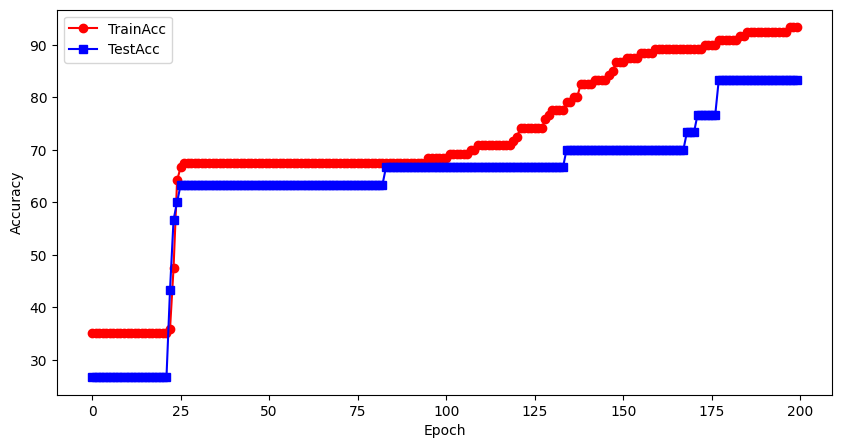

In [ ]:
fig = plt.figure(figsize = (10,5))
plt.plot(trainACC,'ro-')
plt.plot(testACC,'bs-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['TrainAcc','TestAcc'])

In [ ]:
trainSetsizes = np.linspace(0.2,0.95,10)

allTrainAcc = np.zeros((len(trainSetsizes),numofepochs))
allTestAcc = np.zeros((len(trainSetsizes),numofepochs))

for i in range(len(trainSetsizes)):

    ANNiris,lossfun,optimizer = build_model()

    trainAcc,testAcc = train_model(trainSetsizes[i])

    allTrainAcc[i,:] = trainAcc
    allTestAcc[i,:] = testAcc


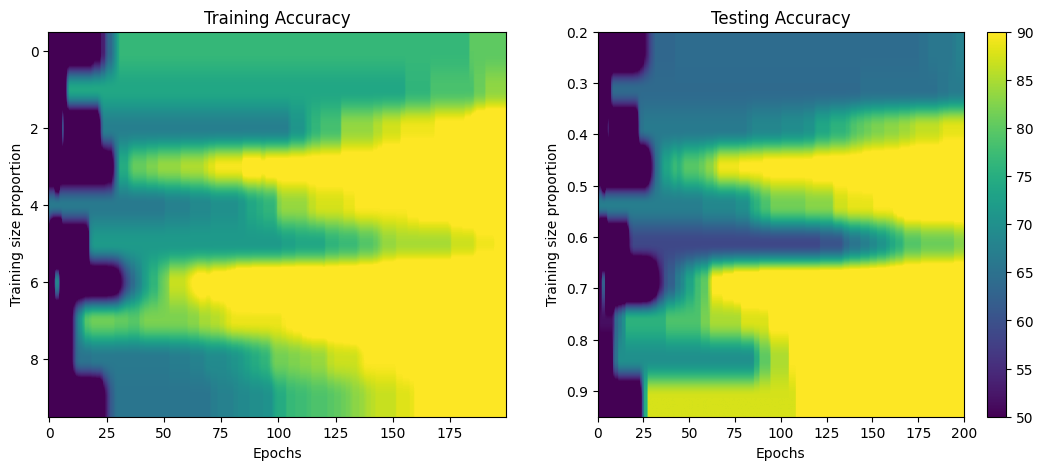

In [ ]:
fig,axes = plt.subplots(1,2,figsize = (13,5))

axes[0].imshow(allTrainAcc,aspect='auto',vmin=50,vmax=90)
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Training size proportion')
axes[0].set_title('Training Accuracy')

p = axes[1].imshow(allTestAcc,aspect='auto',vmin=50,vmax=90,extent=[0,numofepochs,trainSetsizes[-1],trainSetsizes[0]])
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Training size proportion')
axes[1].set_title('Testing Accuracy')
fig.colorbar(p,ax=axes[1])

plt.show()


# Cross - validation (Dataloader)

In [ ]:
#import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from torch.utils.data import DataLoader,TensorDataset

In [ ]:
#import iris dataset
import seaborn as sns
iris = sns.load_dataset('iris')

#convert from pandas dataframe to tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()

#Create the true labels
labels = torch.zeros(len(data),dtype=torch.long)
labels[iris.species == 'setosa'] = 0
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

In [ ]:
#Split the data using sklearn
train_data,test_data,train_labels,test_labels = train_test_split(data,labels,train_size=0.8)

#Convert them into PyTorch datasets
train_data = TensorDataset(train_data,train_labels)
test_data = TensorDataset(test_data,test_labels)

#Now create dataloader objects
train_loader = DataLoader(train_data,shuffle=True,batch_size=12)
test_loader = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [ ]:
def build_model():
    #Build the model
    ANNiris = nn.Sequential(
        nn.Linear(4,64),
        nn.ReLU(),
        nn.Linear(64,64),
        nn.ReLU(),
        nn.Linear(64,3),
    )

    #lossfun
    lossfun = nn.CrossEntropyLoss()

    #optimizer
    optimizer = torch.optim.SGD(ANNiris.parameters(),lr = 0.01)

    return ANNiris,lossfun,optimizer

In [ ]:
numofepochs = 500

def train_model():

    trainACC = []
    testACC = []

    for epoch in range(numofepochs):

        batchACC = []

        for data_tr,labels_tr in train_loader:

            #forwardpass
            yhat = ANNiris(data_tr)

            #loss calc
            loss = lossfun(yhat,labels_tr)

            #back prop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batchACC.append(100*torch.mean((torch.argmax(yhat,axis=1) == labels_tr).float()).item())

        #Calculate train Accuracy
        trainACC.append(np.mean(batchACC))

        #Calculate test Accuracy
        test_d,test_l = next(iter(test_loader)) #Extract test data and labels from test loader
        pred = ANNiris(test_d)
        testACC.append(100*torch.mean((torch.argmax(pred,axis=1) == test_l).float()).item())

    return trainACC,testACC

In [ ]:
#Now test the model
ANNiris,lossfun,optimizer = build_model()

trainACC,testACC = train_model()


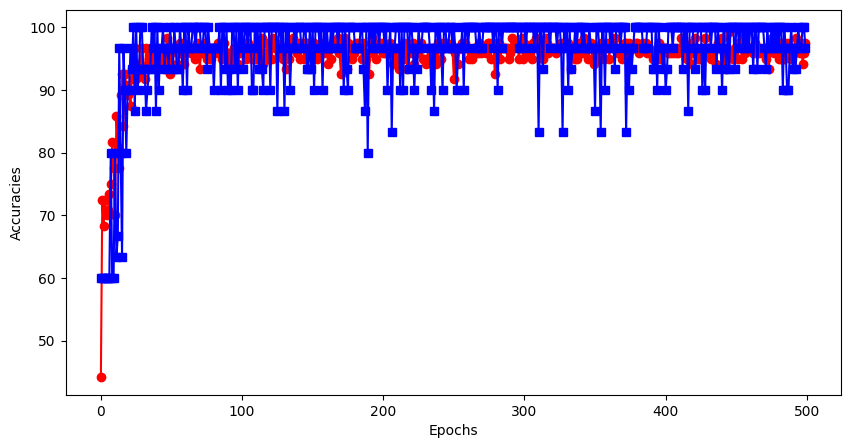

In [ ]:
#PLot the accuracies

fig = plt.figure(figsize=(10,5))

plt.plot(trainACC,'ro-')
plt.plot(testACC,'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.show()



# Cross Validation - Regression

In [ ]:
#import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

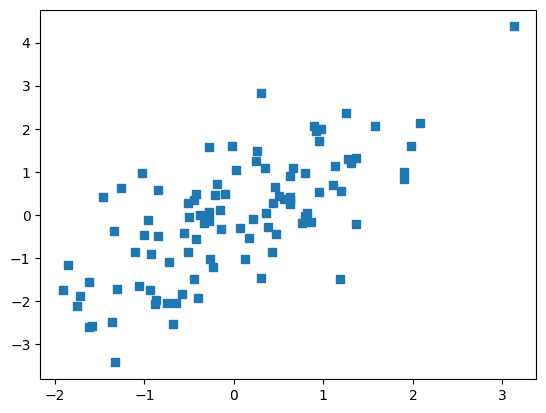

In [ ]:
N = 100
x = torch.randn(N,1)
y = x + torch.randn(N,1)

plt.plot(x,y,'s')
plt.show()

In [ ]:
#build model
ANNreg = nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1)
)

In [ ]:
learning_rate = 0.01

lossfun = nn.MSELoss()

optimizer = torch.optim.SGD(ANNreg.parameters(),lr = 0.01)

In [ ]:
#Select training data
trainidx = np.random.choice(range(N),80,replace=False)
trainBool = np.zeros(N,dtype=bool)

for i in trainidx:
    trainBool[i] = True

print(x[trainBool].shape)
print(x[~trainBool].shape)

torch.Size([80, 1])
torch.Size([20, 1])


In [ ]:
#Train the model

numofepochs = 500

for epoch in range(numofepochs):

    #forward pass
    yhat = ANNreg(x[trainBool])

    #loss
    loss = lossfun(yhat,y[trainBool])

    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
#Final pred for train data
train_pred = ANNreg(x[trainBool]).detach()

#Compute the losses of test set

test_pred = ANNreg(x[~trainBool])

test_loss = lossfun(test_pred,y[~trainBool])

print(f'The final training loss = {loss.detach():.2f}')
print(f'The final testing loss = {test_loss.detach():.2f}')

The final training loss = 1.09
The final testing loss = 0.88


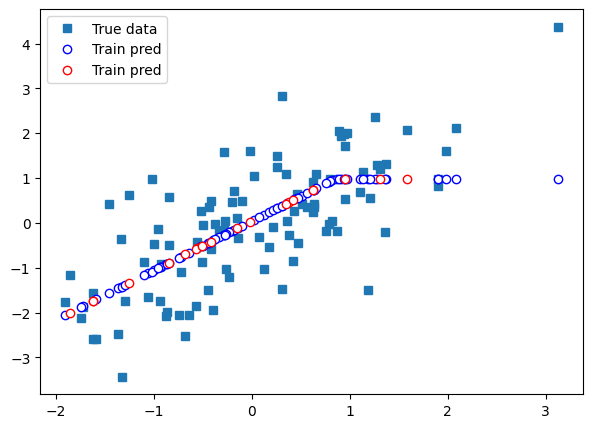

In [ ]:
#plot the data

fig = plt.figure(figsize=(7,5))

plt.plot(x,y,'s',label='True data')
plt.plot(x[trainBool],train_pred,'bo',markerfacecolor='w',label='Train pred')
plt.plot(x[~trainBool],test_pred.detach(),'ro',markerfacecolor='w',label='Train pred')
plt.legend()
plt.show()